In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [41]:
os.getcwd()

'F:\\New folder\\CampusPlacementPrediction'

In [2]:
df = pd.read_csv("train.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
df['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [5]:
df.drop('sl_no',axis=1,inplace=True)

In [6]:
categorical = df.select_dtypes(include="object")
numerical = df.select_dtypes(exclude="object")

In [7]:
categorical.head()

,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed


In [8]:
#Salary will be offered to the student placed an all non placed students have NAN in the salary field so removing salary 

In [9]:
df.drop('salary',axis=1,inplace=True)

In [10]:
df.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [11]:
df.dtypes

gender              int64
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
dtype: object

<Axes: xlabel='degree_p', ylabel='Count'>

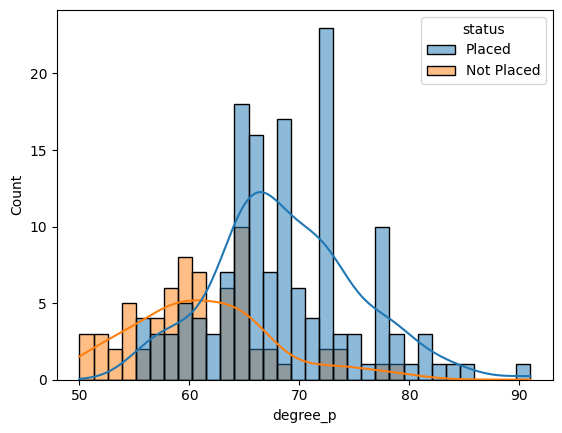

In [12]:
sns.histplot(data=df,x='degree_p',bins=32,kde=True,hue='status')

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [14]:
numerical = df.select_dtypes(exclude="object")
numerical.head()

,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,0,67.00,91.00,58.00,55.0,58.80
1,0,79.33,78.33,77.48,86.5,66.28
2,0,65.00,68.00,64.00,75.0,57.80
3,0,56.00,52.00,52.00,66.0,59.43
4,0,85.80,73.60,73.30,96.8,55.50


In [15]:
numerical = numerical.drop('gender',axis=1)

<Axes: >

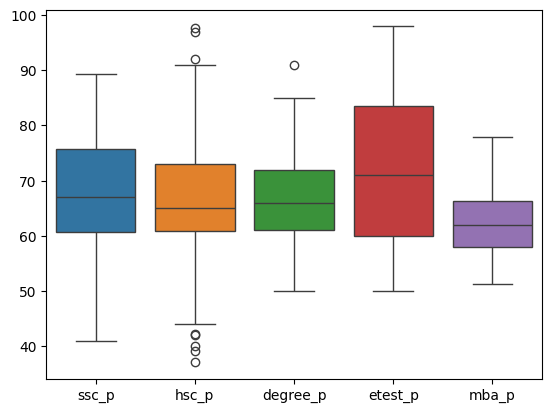

In [16]:
sns.boxplot(numerical)

### Method 2

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
num_pipeline = Pipeline(
    steps=[
        ("SimpleImputer",SimpleImputer(strategy="mean")),
        ("Scaler",StandardScaler()),
    ]
)
cat_pipeline = Pipeline(
    steps=[
        ("SimpleImputer",SimpleImputer(strategy="most_frequent")),
        ("encoder",OneHotEncoder()),
    ]
)

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
df['status'] = encoder.fit_transform(df[['status']])

f:\New folder\CampusPlacementPrediction\venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1


In [23]:
df = df.drop('gender',axis=1)

In [22]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1


In [23]:
X,y = df.drop('status',axis=1),df['status']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
X.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'],
      dtype='object')

In [26]:
num =  X.select_dtypes(exclude="object")
cat = X.select_dtypes(include="object")

num_features = list(num.columns)
cat_features = list(cat.columns)

In [27]:
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,num_features),
('cat_pipeline',cat_pipeline,cat_features)
])

In [28]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
smote = SMOTE(sampling_strategy='auto')

In [31]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [32]:
X_train.shape

(208, 20)

In [33]:
X_train.head()

,num_pipeline__gender,num_pipeline__ssc_p,num_pipeline__hsc_p,num_pipeline__degree_p,num_pipeline__etest_p,num_pipeline__mba_p,cat_pipeline__ssc_b_Central,cat_pipeline__ssc_b_Others,cat_pipeline__hsc_b_Central,cat_pipeline__hsc_b_Others,cat_pipeline__hsc_s_Arts,cat_pipeline__hsc_s_Commerce,cat_pipeline__hsc_s_Science,cat_pipeline__degree_t_Comm&Mgmt,cat_pipeline__degree_t_Others,cat_pipeline__degree_t_Sci&Tech,cat_pipeline__workex_No,cat_pipeline__workex_Yes,cat_pipeline__specialisation_Mkt&Fin,cat_pipeline__specialisation_Mkt&HR
0,1.372813,-0.033107,0.353438,-0.111506,1.173063,1.747467,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.728431,-0.396059,0.086020,1.087196,0.714007,-0.285087,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.728431,-1.212701,-1.696772,-1.177019,1.302364,-0.874386,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.728431,-1.394177,-0.270539,-0.111506,1.020045,-1.052587,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.728431,-1.394177,-0.092259,-1.177019,0.178440,-0.396242,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [34]:
X_train.shape

(208, 20)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
models = {
    'Random Forest':RandomForestClassifier(),
    'Logistic Regression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'Naive Bayes':GaussianNB(),
    'KNN' : KNeighborsClassifier(),
    'SVM' : SVC()   
}
def model_evaluation(models,X_train,X_test,y_train,y_test):
    result = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        acc_score = accuracy_score(y_test,y_pred)
        print(classification_report(y_test,y_pred))
        print(confusion_matrix(y_test,y_pred))
        result[list(models.keys())[i]] = acc_score
    return result

In [37]:
result = model_evaluation(models,X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.72      0.62      0.67        21
           1       0.83      0.89      0.86        44

    accuracy                           0.80        65
   macro avg       0.78      0.75      0.76        65
weighted avg       0.80      0.80      0.80        65

[[13  8]
 [ 5 39]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        21
           1       0.87      0.89      0.88        44

    accuracy                           0.83        65
   macro avg       0.81      0.80      0.80        65
weighted avg       0.83      0.83      0.83        65

[[15  6]
 [ 5 39]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        21
           1       0.83      0.89      0.86        44

    accuracy                           0.80        65
   macro avg       0.78      0.75      0.76        65
weighted avg       0.80      0.80   

In [38]:
result

{'Random Forest': 0.8,
 'Logistic Regression': 0.8307692307692308,
 'DecisionTreeClassifier': 0.8,
 'Naive Bayes': 0.7076923076923077,
 'KNN': 0.8,
 'SVM': 0.7846153846153846}

In [36]:
df.head()

,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1


In [37]:
import os
os.chdir("F:/New folder/CampusPlacementPrediction")

In [38]:
df.to_csv("artifacts/raw.csv",index=False)